## Задание 1. Практическая часть. Производные, интегралы в SymPy

### Пример оформления решения

Подключаем пакеты Python

In [4]:
from sympy import * # пакет символьных вычислений
import numpy as np # пакет для работы с многомерными массивами

Создаем символы (переменные)

In [5]:
x, y, t, C = symbols("x y t C")

Теперь можно создавать выражения с этими переменными

In [6]:
f = x ** 2 - sin(x) / 2 + sqrt(x - 1)
f

x**2 + sqrt(x - 1) - sin(x)/2

Дифференцирование выражений выполняется командой diff

In [7]:
diff(f, x)

2*x - cos(x)/2 + 1/(2*sqrt(x - 1))

Интегрирование - командой integrate

In [8]:
integrate(f, x)

x**3/3 + 2*(x - 1)**(3/2)/3 + cos(x)/2

Определенный интеграл вычисляется той же командой, но с указанием во втором аргументе пределов интегрирования

In [9]:
integrate(f, (x, 2, 5))

cos(5)/2 - cos(2)/2 + 131/3

Решим простейшее дифференциальное уравнение $xy'+2=x^2$ с начальным условием $y(1)=2$

In [10]:
# создаем производную
dydx = Derivative(y, x) # dydx - имя переменной, обозначающей производную
dydx

Derivative(y, x)

In [11]:
# создаем уравнение, функция Eq(a, b) обозначает равенство a = b
eq = Eq(x * dydx + 2, x ** 2)
eq

Eq(x*Derivative(y, x) + 2, x**2)

In [12]:
# находим производную с помощью команды solve - решение алгебраических уравнений, результат - список решений, выбор нужного решения через индексирование
sol = solve(eq, dydx)[0]
sol

x - 2/x

In [13]:
# интегрируем найденную производную и вручную добавляем константу интегрирования - получаем общее решение заданного ДУ
dsol = integrate(sol, x) + C
dsol

C + x**2/2 - 2*log(x)

In [14]:
# Находим константу интегрирования, решая уравнение y(x0, C) = y0, где x0, y0 - начальное условие
x0, y0 = 1, 2 # см. условие задачи выше
X = dsol.subs(x, x0) # подставили x0 вместо x в решение dsol
eq = Eq(y0, X) # приравняли к y0
C0 = solve(eq)[0] # нашли С
dsol0 = dsol.subs(C, C0) # подставили C в общее решение
dsol0 # решение начальной задачи

x**2/2 - 2*log(x) + 3/2

Построим графики с интегральными кривыми

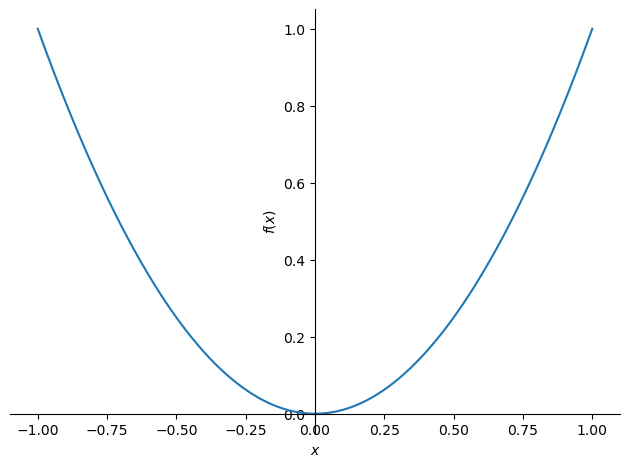

In [15]:
# график функции f(x) в интервале от a до b строится командой plot( f(x), (x,a,b) )
p = plot(x ** 2, (x, -1, 1))

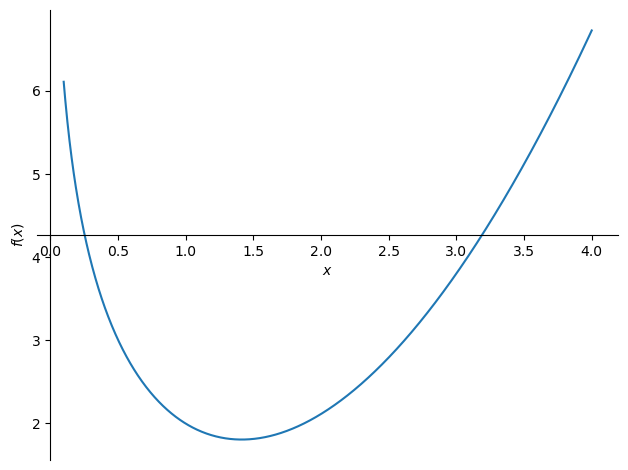

In [16]:
# график решения dsol0 начальной задачи
p = plot(dsol0, (x, 0.1, 4))

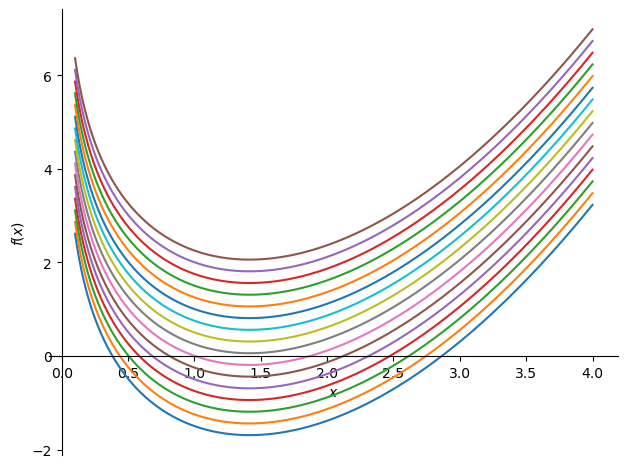

In [17]:
# график семейства интегральных кривых общего решения dsol
p = plot(show=False) # пустой график
for c in np.arange(-2, 2, 0.25): # цикл по значениям константы C
  p1 = plot(dsol.subs(C, c), (x, 0.1, 4), show=False) # график новой кривой
  p.extend(p1) # добавляем новый график к общему графику
p.show() # показываем общий график

### Задание
По описанной выше схеме для Вашего варианта вычислите производную из пункта (а) аналитической части (задание 1.1)

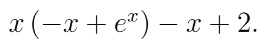

In [29]:
x = symbols("x")

In [30]:
 f = x * (-x+exp(x)) - x + 2

In [31]:
diff(f, x)

x*(exp(x) - 1) - x + exp(x) - 1

Для Вашего варианта найдите общее решение ДУ из пункта б аналитической части (задание 1.1)

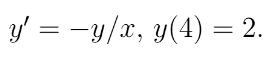

In [36]:
y = Function("y")(x)
dydx = y.diff(x) # dydx - имя переменной, обозначающей производную
dydx

Derivative(y(x), x)

In [37]:
eq = Eq(dydx, -y/x)
eq

Eq(Derivative(y(x), x), -y(x)/x)

In [38]:
sol = dsolve(eq)
sol

Eq(y(x), C1/x)

Для Вашего варианта найдите решение начальной задачи из пункта б аналитической части (задание 1.1)

In [42]:
C1 = symbols("C1")
# Находим константу интегрирования, решая уравнение y(x0, C) = y0, где x0, y0 - начальное условие
x0, y0 = 4, 2
X = sol.rhs.subs(x, x0) # подставили x0 вместо x в решение dsol
eq = Eq(y0, X) # приравняли к y0
C0 = solve(eq)[0] # нашли С
dsol0 = sol.subs(C1, C0) # подставили C в общее решение
dsol0 # решение начальной задачи

Eq(y(x), 8/x)

## Задание 2. Свободное падение тел

Создаем переменные $x$, $y$, $t$, $w_0$, $\alpha$ и $g$

In [45]:
x, y, t, w0, alpha, g = symbols("x y t w0 alpha g")

Создаем начальные условия $x_0=0$, $y_0=0$, $u_0=w_0\cos{\alpha}$, $v_0=w_0\sin{\alpha}$

In [48]:
x0 = 0
y0 = 0
u0 = w0 * cos(alpha)
v0 = w0 * sin(alpha)

Создаем правые части простейших дифференциальных уравнений для горизонтальной и вертикальной скоростей: $$du/dt=0, dv/dt=-g$$

In [49]:
U = 0
V = -g

Интегрируем эти правые части и находим сами скорости с учетом начальных условий: $$u=\int U dt + u_0, v = \int V dt + v_0$$

In [50]:
u = integrate(U, t) + u0
v = integrate(V, t) + v0
u, v # выводим на экран найденные интегралы

(w0*cos(alpha), -g*t + w0*sin(alpha))

Получили правые части простейших ДУ для $x(t)$ и $y(t)$: $dx/dt=u$, $dy/dt=v$. Интегрируем эти выражения и находим $x(t)$ и $y(t)$ с учетом начальных условий: $$x=\int u dt + x_0, y=\int v dt + y0$$

In [51]:
xsol = integrate(u, t) + x0
ysol = integrate(v, t) + y0
xsol, ysol # выводим на экран найденные интегралы

(t*w0*cos(alpha), -g*t**2/2 + t*w0*sin(alpha))

Вычисляем время $t_1$ от начала полета до падения, решая уравнение $y(t)=0$. Выражение $y(t)$ хранится в переменной ysol. Данное уравнение имеет два решения, нужно записать в переменную t1 ненулевое решение.

In [59]:
t_solutions = solve(ysol, t)
t1 = [sol for sol in t_solutions if sol != 0][0]
t1 # вывод на экран

2*w0*sin(alpha)/g

Находим $x$-координату точки падения, подставляя найденное выше значение $t_1$ в выражение $x(t)$ (переменная xsol):

In [60]:
x1 = xsol.subs(t, t1) # вместо t подставляем t1
x1 # вывод на экран

2*w0**2*sin(alpha)*cos(alpha)/g

Выражаем $y$ через $x$, исключая из системы $x(t)=0$, $y(t)=0$ время $t$:

In [61]:
T = solve(Eq(xsol, x), t)[0] # выразили t через x
Y = ysol.subs(t, T) # подставили T в y(t) вместо t
Y # вывод формулы на экран

-g*x**2/(2*w0**2*cos(alpha)**2) + x*sin(alpha)/cos(alpha)

Строим траекторию движения тела от точки броска $x=0$ до точки падения $x=x_1$ для ускорения свободного падения $g=9.8$, начальной скорости $w_0=1$, угла $\alpha=\pi/4$:

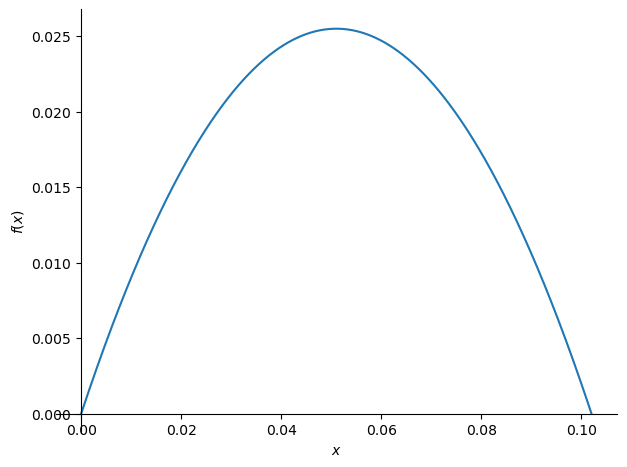

In [67]:
ya = Y.subs(g, 9.8).subs(w0, 1).subs(alpha, np.pi/4) # уравнение траектории
x1a = x1.subs(g, 9.8).subs(w0, 1).subs(alpha, np.pi/4) # точка падения
p = plot(ya, (x, 0, x1a))

Постройте на том же графике аналогичную траекторию полета тела на заданном космическом теле (ускорение свободного падения для этого тела найдите в Интернете):
1. Луна
2. Марс

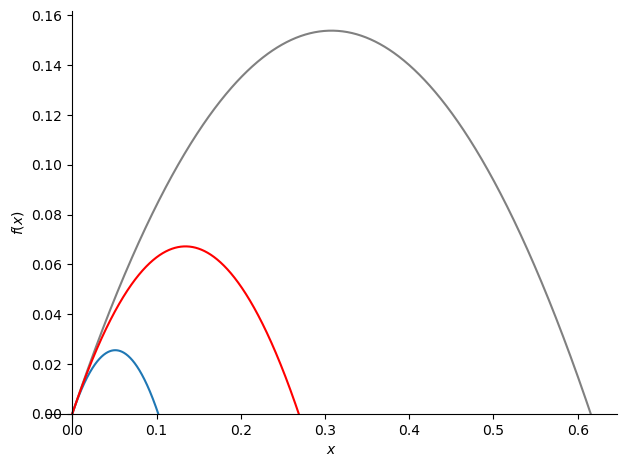

In [64]:
g_moon  = 1.625
g_mars  = 3.72

ya_moon = Y.subs({g: g_moon, w0: 1, alpha: np.pi/4})
x1_moon = x1.subs({g: g_moon, w0: 1, alpha: np.pi/4})
p1 = plot(ya_moon, (x, 0, x1_moon), show=False, line_color='gray', label='Луна')
p.extend(p1)

ya_mars = Y.subs({g: g_mars, w0: 1, alpha: np.pi/4})
x1_mars = x1.subs({g: g_mars, w0: 1, alpha: np.pi/4})
p2 = plot(ya_mars, (x, 0, x1_mars), show=False, line_color='red', label='Марс')
p.extend(p2)

p.show()

## Задание 3. Свободное падение тел, семейство траекторий

Постройте семейство траекторий для разных начальных углов $\alpha\in[\pi/20, \pi/2]$ с шагом $\pi/20$ для вашего космического тела:

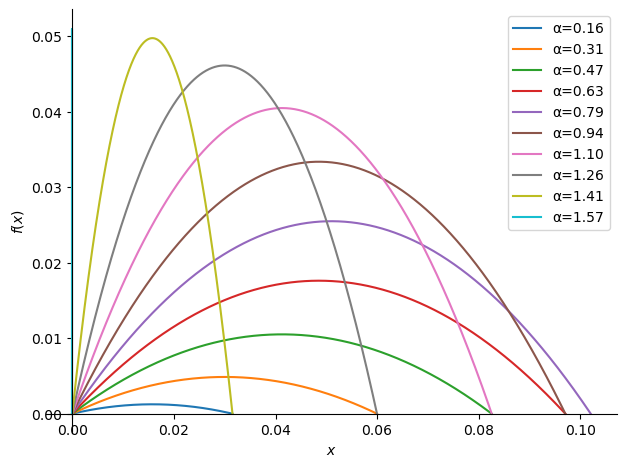

In [68]:
angles = np.arange(np.pi/20, np.pi/2 + 0.01, np.pi/20)
g_val = 9.8
w0_val = 1

alpha0 = angles[0]
ya = Y.subs({g: g_val, w0: w0_val, alpha: alpha0})
x1a = x1.subs({g: g_val, w0: w0_val, alpha: alpha0})
p = plot(ya, (x, 0, x1a), show=False, legend=True, label=f"α={alpha0:.2f}")

for a in angles[1:]:
    ya = Y.subs({g: g_val, w0: w0_val, alpha: a})
    x1a = x1.subs({g: g_val, w0: w0_val, alpha: a})
    p1 = plot(ya, (x, 0, x1a), show=False, legend=True, label=f"α={a:.2f}")
    p.extend(p1)

p.show()

Постройте семейство траекторий для разных начальных скоростей $w_0\in[1,10]$ с шагом $1$ для вашего космического тела

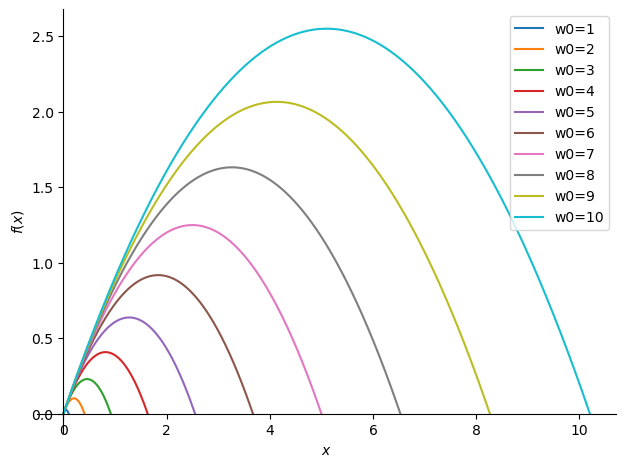

In [69]:
velocities = range(1, 11)

alpha_val = np.pi/4

w0_val = velocities[0]
ya = Y.subs({g: g_val, w0: w0_val, alpha: alpha_val})
x1a = x1.subs({g: g_val, w0: w0_val, alpha: alpha_val})
p = plot(ya, (x, 0, x1a), show=False, legend=True, label=f"w0={w0_val}")

# добавляем остальные траектории
for w0_val in velocities[1:]:
    ya = Y.subs({g: g_val, w0: w0_val, alpha: alpha_val})
    x1a = x1.subs({g: g_val, w0: w0_val, alpha: alpha_val})
    p1 = plot(ya, (x, 0, x1a), show=False, legend=True, label=f"w0={w0_val}")
    p.extend(p1)

p.show()

## Задание 4. Свободное падение балласта

С воздушного шара, который спускается вертикально вниз со скоростью 10 м/с, на высоте 1000 метров сбрасывают алюминиевый балласт массой 10 кг. После сброса на балласт действует сила сопротивления воздуха, пропорциональная его скорости, с коэффициентом сопротивления $k = 5.0$ кг/c. Через 40 секунд на высоте 500 метров был сброшен второй свинцовый балласт массой в 4 раза больше алюминиевого с тем же коэффициентом сопротивления. Какой из балластов достигнет поверхности Земли раньше и с какой разницей по времени, если скорость спуска воздушного шара на высоте 500 метров при сбросе второго балласта составила 1 м/с. Ускорение свободного падения считать равным 10 м/$с^2$. Приведите графики изменения скорости с течением времени для каждого балласта.

### ДУ для скорости

In [70]:
t, m, k, g = symbols('t m k g', positive=True)
v = Function('v')

# уравнение m dv/dt = mg - k v
ode = Eq(m*v(t).diff(t), m*g - k*v(t))

In [71]:
ode

Eq(m*Derivative(v(t), t), g*m - k*v(t))

In [72]:
sol = dsolve(ode)
sol

Eq(v(t), C1*exp(-k*t/m) + g*m/k)

In [77]:
# Начальные условия
m1 = 10 
v0_1 = 10 
k_val = 5

# Ищем константу
v_general = sol.rhs
C1 = symbols('C1')
C_val = solve(Eq(v_general.subs(t,0), v0_1), C1)[0]
C_val

-g*m/k + 10

In [80]:
# Подставляем наши значения и ищем частное решение
v1 = v_general.subs({m:m1, g:10, k:k_val, C1:C_val})
v1

20 - 10*exp(-t/2)

### ДУ для движения

In [86]:
# Когда груз достигнет земли
h0_1= 1000
y1 = h0_1 - integrate(v1, (t, 0, t))
y1

-20*t + 1020 - 20*exp(-t/2)

In [87]:
# Находим точку падения
t_fall_1 = solve(Eq(y1, 0), t)
t_fall_1

[2*LambertW(-exp(-51/2)/2) + 51]

### Второй балласт

In [88]:
# Начальные условия
m2 = 4 * m1
v0_2 = 1
h0_2 = 500

# Ищем константу
C_val2 = solve(Eq(v_general.subs(t,0), v0_2), C1)[0]
C_val2

(-g*m + k)/k

In [89]:
# Подставляем наши значения и ищем частное решение
v2 = v_general.subs({m:m2, g:10, k:k_val, C1:C_val2})
v2

80 - 79*exp(-t/8)

In [90]:
y2 = h0_2 - integrate(v2, (t, 0, t))
y2

-80*t + 1132 - 632*exp(-t/8)

In [91]:
t_fall_2 = solve(Eq(y2, 0), t)
t_fall_2

[8*LambertW(-79*exp(-283/160)/80) + 283/20]

### Время падения двух балластов

In [99]:
t1 = [tt.evalf() for tt in t_fall_1 if tt>0][0]
t2 = [tt.evalf() for tt in t_fall_2 if tt>0][0] + 40
print("Алюминий:", round(t1, 3), "сек")
print("Свинец:", round(t2, 3), "сек")
print("Разница:", round(abs(t1 - t2), 3))
if t1 < t2: print("Алюминиевый балласт упадёт раньше")
else: print("Свинцовый балласт упадёт раньше")

Алюминий: 51.0000000000000 сек
Свинец: 52.493 сек
Разница: 1.493
Алюминиевый балласт упадёт раньше


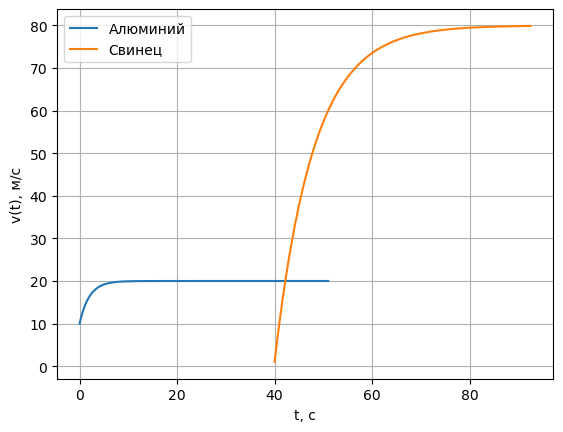

In [105]:
from sympy import lambdify
import matplotlib.pyplot as plt

v1_func = lambdify(t, v1, 'numpy')
v2_func = lambdify(t, v2, 'numpy')

T1 = float(t1)+10
T2 = float(t2)+10

ts1 = np.linspace(0, float(t1), 200)
ts2 = np.linspace(0, float(t2), 200)

plt.plot(ts1, v1_func(ts1), label="Алюминий")
plt.plot(ts2+40, v2_func(ts2), label="Свинец")
plt.xlabel("t, c")
plt.ylabel("v(t), м/с")
plt.legend()
plt.grid()
plt.show()
